# Seed Analysis

In [38]:
import sys

assert sys.version_info >= (3, 7)

In [39]:
#from google.colab import drive

## Mount Google Drive (for Colab users)
#try:
#    drive.mount('/content/drive')
#except:
#    pass

In [40]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [41]:
import pandas as pd

# Read CSV file - works for both local and Colab
df = pd.read_csv('dataset/seeds_dataset.csv')

In [42]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   kernel_length   210 non-null    float64
 4   kernel_width    210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   kernel_groove   210 non-null    float64
 7   class           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [44]:
df['class'].unique()

array([1, 2, 3])

In [45]:
class_dfs = [df[df['class'] == i].drop('class', axis=1) for i in df['class'].unique()]

In [46]:
class_dfs[0].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000


In [47]:
class_dfs[1].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


In [48]:
class_dfs[2].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000


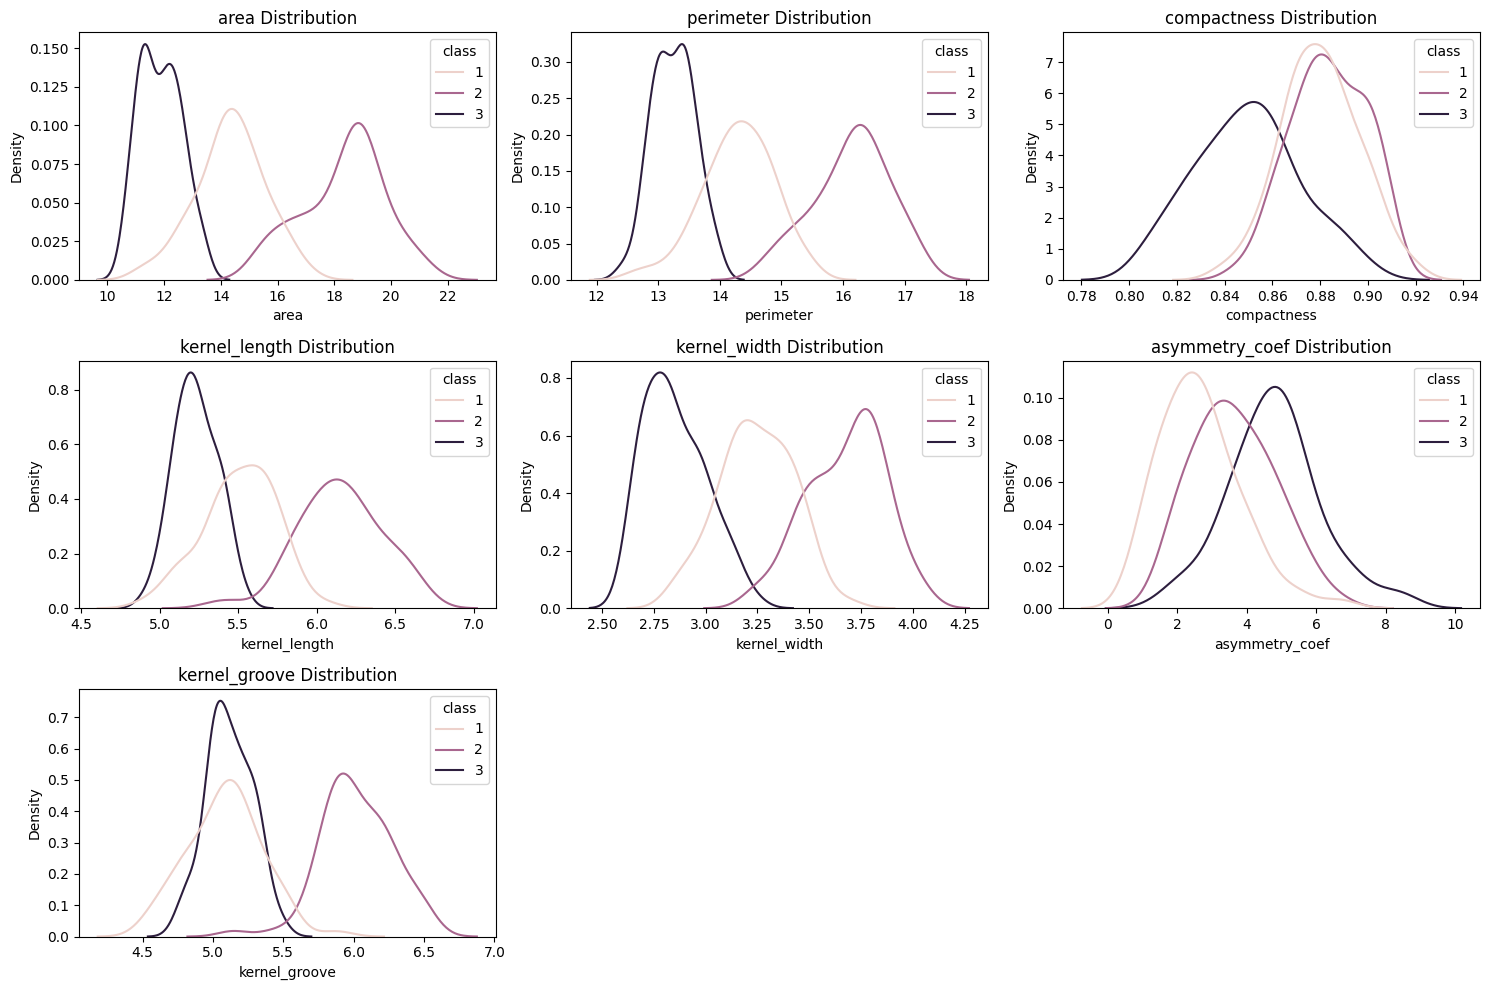

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='class')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()